In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, confusion_matrix, classification_report
)
# Load cleaned dataset
df = pd.read_csv("C:\\Users\\arish\\OneDrive\\Desktop\\Early-CKD-Detection\\dataset\\ckd_cleaned.csv")

# Identify numerical and categorical columns
numerical_cols = ["age","sg", "bp", "bgr", "bu", "sc", "sod", "pot", "hemo", "wbcc", "rbcc"]
categorical_cols = ["htn", "dm", "pe", "ane", "class"]



In [2]:
# Define features (X) and target (y)
X = df.drop(columns=['class'])
y = df['class']

# Split dataset FIRST (avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.32, 
    random_state=42, 
    stratify=y
)

# Verify no data leakage
train_test_common = pd.merge(X_train, X_test, how='inner')

# Scale ONLY the training data, then transform test data
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Save scaler for API use
joblib.dump(scaler, "C:\\Users\\arish\\OneDrive\\Desktop\\Early-CKD-Detection\\models\\scaler.pkl")
training_features = list(X.columns)
joblib.dump(training_features, "C:\\Users\\arish\\OneDrive\\Desktop\\Early-CKD-Detection\\models\\training_features.pkl")

# Store results
results = {
    "Model": [], "Accuracy": [], "Precision": [], "Recall": [],
    "F1-Score": [], "Training Time (s)": []}

In [3]:
from sklearn.linear_model import LogisticRegression

# Train model
log_reg = LogisticRegression()
start_time = time.time()
log_reg.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions
y_pred = log_reg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results["Model"].append("Logistic Regression")
results["Accuracy"].append(acc)
results["Precision"].append(prec)
results["Recall"].append(rec)
results["F1-Score"].append(f1)
results["Training Time (s)"].append(training_time)

# Evaluate performance
print("🔹Logistic Regression  Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))
print("=" * 50)


🔹Logistic Regression  Results:
Accuracy: 0.9844
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.97      0.99        80

    accuracy                           0.98       128
   macro avg       0.98      0.99      0.98       128
weighted avg       0.98      0.98      0.98       128



In [4]:
from sklearn.tree import DecisionTreeClassifier

# Train model
dt = DecisionTreeClassifier()
start_time = time.time()
dt.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results["Model"].append("Decision Tree")
results["Accuracy"].append(acc)
results["Precision"].append(prec)
results["Recall"].append(rec)
results["F1-Score"].append(f1)
results["Training Time (s)"].append(training_time)

# Evaluate performance
print("🔹 Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))
print("=" * 50)

🔹 Decision Tree Results:
Accuracy: 0.9375
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        48
           1       0.97      0.93      0.95        80

    accuracy                           0.94       128
   macro avg       0.93      0.94      0.93       128
weighted avg       0.94      0.94      0.94       128



In [5]:
from sklearn.ensemble import RandomForestClassifier

# Train model
rf = RandomForestClassifier(n_estimators=100)
start_time = time.time()
rf.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results["Model"].append("Random Forest")
results["Accuracy"].append(acc)
results["Precision"].append(prec)
results["Recall"].append(rec)
results["F1-Score"].append(f1)
results["Training Time (s)"].append(training_time)

# Evaluate performance
print("🔹 Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))
print("=" * 50)

🔹 Random Forest Results:
Accuracy: 0.9922
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.99      0.99        80

    accuracy                           0.99       128
   macro avg       0.99      0.99      0.99       128
weighted avg       0.99      0.99      0.99       128



In [6]:
from sklearn.svm import SVC

# Train model
svm = SVC(probability=True)
start_time = time.time()
svm.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions
y_pred = svm.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results["Model"].append("SVM")
results["Accuracy"].append(acc)
results["Precision"].append(prec)
results["Recall"].append(rec)
results["F1-Score"].append(f1)
results["Training Time (s)"].append(training_time)

# Evaluate performance
print("🔹 SVM Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))
print("=" * 50)

🔹 SVM Results:
Accuracy: 0.9844
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        48
           1       0.99      0.99      0.99        80

    accuracy                           0.98       128
   macro avg       0.98      0.98      0.98       128
weighted avg       0.98      0.98      0.98       128



In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Train model
knn = KNeighborsClassifier()
start_time = time.time()
knn.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results["Model"].append("KNeighbors")
results["Accuracy"].append(acc)
results["Precision"].append(prec)
results["Recall"].append(rec)
results["F1-Score"].append(f1)
results["Training Time (s)"].append(training_time)

# Evaluate performance
print("🔹 KNeighbors Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))
print("=" * 50)

🔹 KNeighbors Results:
Accuracy: 0.9453
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        48
           1       0.99      0.93      0.95        80

    accuracy                           0.95       128
   macro avg       0.94      0.95      0.94       128
weighted avg       0.95      0.95      0.95       128



In [8]:
from sklearn.ensemble import GradientBoostingClassifier

# Train model
gb = GradientBoostingClassifier(n_estimators=100)
start_time = time.time()
gb.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions
y_pred = gb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results["Model"].append("Gradient Boosting")
results["Accuracy"].append(acc)
results["Precision"].append(prec)
results["Recall"].append(rec)
results["F1-Score"].append(f1)
results["Training Time (s)"].append(training_time)

# Evaluate performance
print("🔹 GradientBoosting Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))
print("=" * 50)


🔹 GradientBoosting Results:
Accuracy: 0.9844
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.97      0.99        80

    accuracy                           0.98       128
   macro avg       0.98      0.99      0.98       128
weighted avg       0.98      0.98      0.98       128



In [9]:
import xgboost as xgb

# Train XGBoost Model
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)
start_time = time.time()
xgb_model.fit(X_train, y_train)
training_time = time.time() - start_time
    
# Make predictions
y_pred = xgb_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results["Model"].append("XGBoost")
results["Accuracy"].append(acc)
results["Precision"].append(prec)
results["Recall"].append(rec)
results["F1-Score"].append(f1)
results["Training Time (s)"].append(training_time)

# Evaluate performance
print("🔹 XGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))
print("=" * 50)

🔹 XGBoost Results:
Accuracy: 0.9844
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        48
           1       0.99      0.99      0.99        80

    accuracy                           0.98       128
   macro avg       0.98      0.98      0.98       128
weighted avg       0.98      0.98      0.98       128



🔍 Model Comparison Results:
                 Model  Accuracy  Precision  Recall  F1-Score  \
2        Random Forest  0.992188   1.000000  0.9875  0.993711   
0  Logistic Regression  0.984375   1.000000  0.9750  0.987342   
3                  SVM  0.984375   0.987500  0.9875  0.987500   
6              XGBoost  0.984375   0.987500  0.9875  0.987500   
5    Gradient Boosting  0.984375   1.000000  0.9750  0.987342   
4           KNeighbors  0.945312   0.986667  0.9250  0.954839   
1        Decision Tree  0.937500   0.973684  0.9250  0.948718   

   Training Time (s)  
2           0.492923  
0           0.015631  
3           0.032753  
6           0.142858  
5           0.452848  
4           0.000000  
1           0.008453  


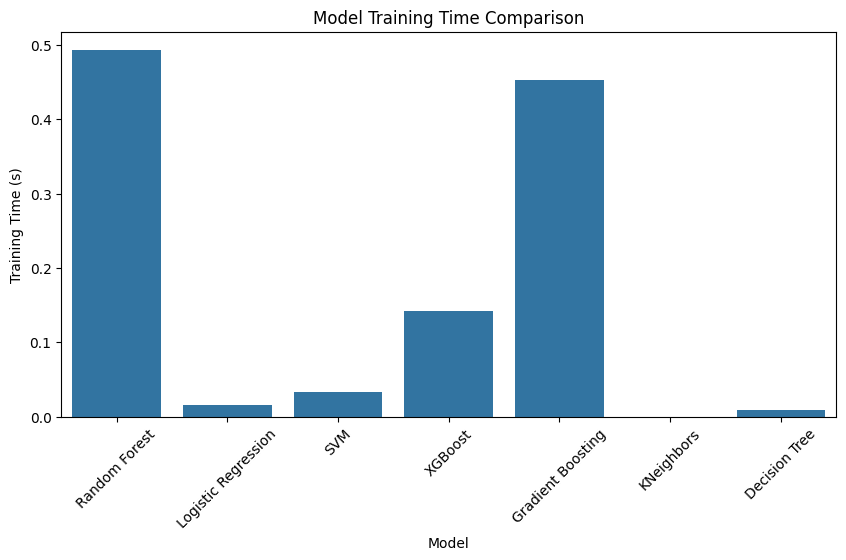

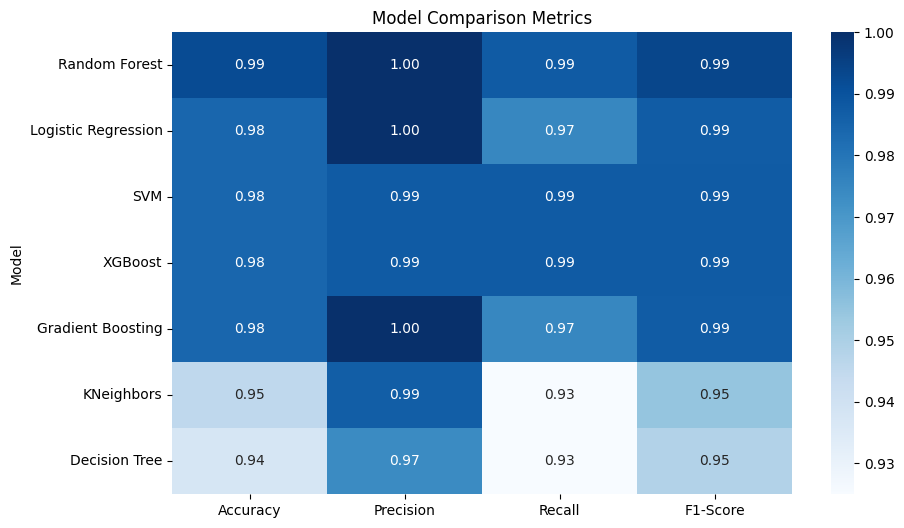

In [10]:
# Display results as DataFrame
df_results = pd.DataFrame(results).sort_values(by=["Accuracy","Training Time (s)"], ascending=[False,True])
print("🔍 Model Comparison Results:")
print(df_results)

# Plot Training Time
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Training Time (s)", data=df_results)
plt.xticks(rotation=45)
plt.title("Model Training Time Comparison")
plt.show()

# Plot Heatmap of Evaluation Metrics
plt.figure(figsize=(10, 6))
sns.heatmap(df_results.set_index("Model").drop("Training Time (s)", axis=1), annot=True, fmt=".2f", cmap="Blues")
plt.title("Model Comparison Metrics")
plt.show()



✅ Best Model Selected: Random Forest
   ↪ Accuracy: 0.9922, Training Time: 0.4929 sec


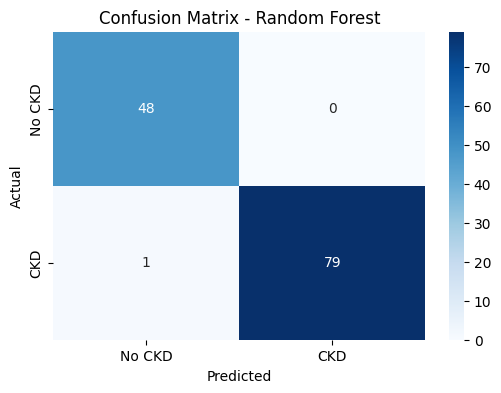

Best model 'Random Forest' saved as 'ckd_best_model.pkl'.


In [11]:
# Define models
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm,
    "KNeighbors": knn,
    "Gradient Boosting": gb,
    "XGBoost": xgb_model
}

# Select the best model 
best_model_row = df_results.iloc[0]
best_model_name = best_model_row["Model"]
best_model = models[best_model_name]

print(f"\n✅ Best Model Selected: {best_model_name}")
print(f"   ↪ Accuracy: {best_model_row['Accuracy']:.4f}, Training Time: {best_model_row['Training Time (s)']:.4f} sec")

# Confusion matrix for best model
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No CKD", "CKD"], yticklabels=["No CKD", "CKD"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

# Save the best model
joblib.dump(best_model, "C:\\Users\\arish\\OneDrive\\Desktop\\Early-CKD-Detection\\models\\ckd_best_model.pkl")
print(f"Best model '{best_model_name}' saved as 'ckd_best_model.pkl'.")

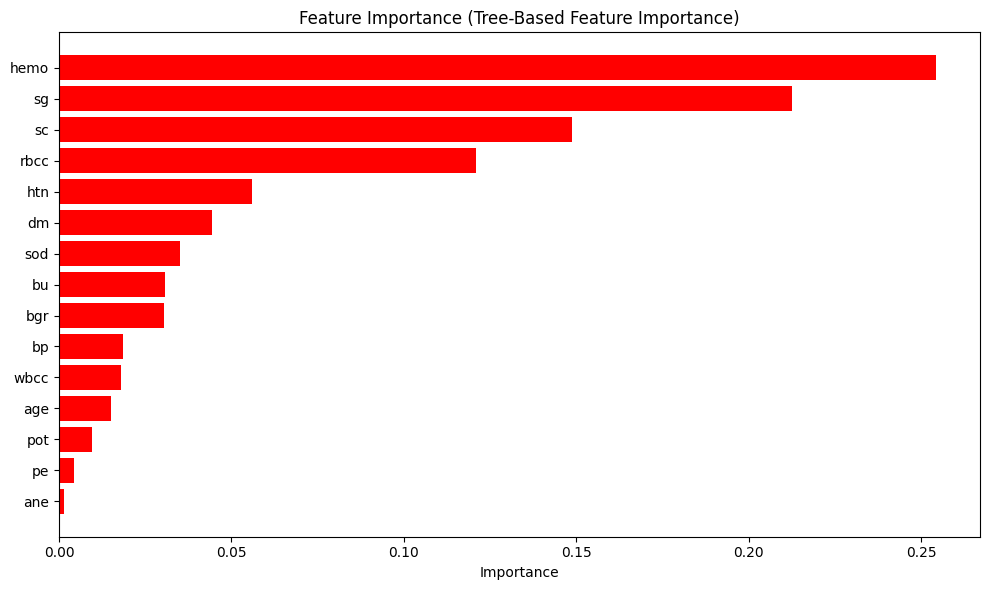

,Feature,Importance
8,hemo,0.254363
2,sg,0.212432
3,sc,0.148741
10,rbcc,0.120853
11,htn,0.056004
12,dm,0.044504
6,sod,0.035204
5,bu,0.030853
4,bgr,0.030432
1,bp,0.018480


In [12]:
def plot_feature_importance(model, feature_names, X_sample=None):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    importances = None
    method = None

    # For linear models (like LogisticRegression)
    if hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])
        method = "Linear Coefficients"

    # For tree-based models
    elif hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        method = "Tree-Based Feature Importance"

    # For other models, fallback to SHAP if possible
    elif X_sample is not None:
        try:
            import shap
            explainer = shap.Explainer(model, X_sample)
            shap_values = explainer(X_sample)
            importances = np.abs(shap_values.values).mean(axis=0)
            method = "SHAP Values"
        except Exception as e:
            print("SHAP failed:", e)
            return
    else:
        print("Model does not support feature importance directly. Provide X_sample for SHAP.")
        return

    # Plotting
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='red')
    plt.xlabel('Importance')
    plt.title(f'Feature Importance ({method})')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    return importance_df

plot_feature_importance(best_model, X.columns, X_sample=X_test)
